In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data set
df=pd.read_csv("C:\\Users\\PMLS\\Downloads\\archive (12)\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# The Information About the Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


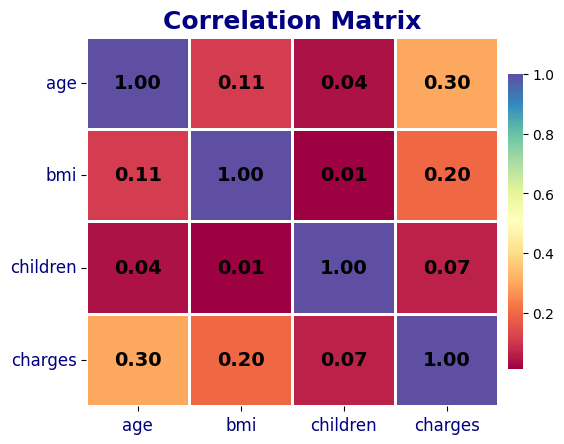

In [4]:
# Relationship Between Features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='Spectral', 
    linewidths=2, 
    linecolor='white', 
    annot_kws={"size":14, "weight":"bold", "color":"black"},
    cbar_kws={"shrink":0.8, "aspect":20, "pad":0.02})
plt.title('Correlation Matrix', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(fontsize=12, rotation=0,color='navy')
plt.yticks(fontsize=12, rotation=0, color='navy')
plt.yticks(fontsize=12)
plt.show()

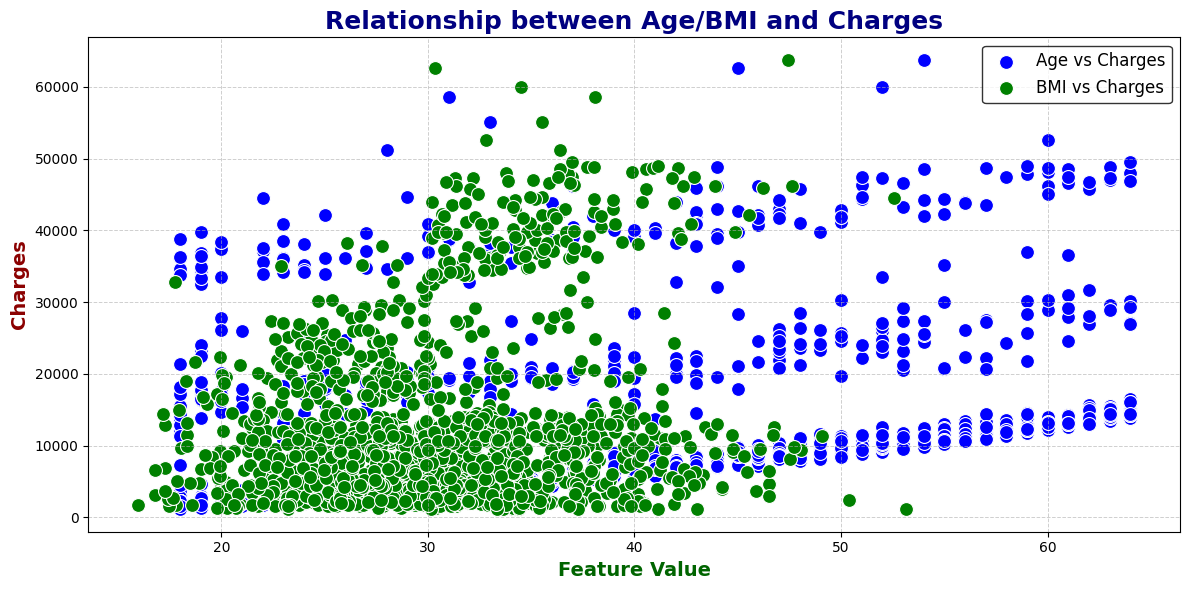

In [5]:
# Relationship Between Charges and Age , BMI 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=df, color='blue',markers='o', s=100)
sns.scatterplot(x='bmi', y='charges', data=df, color='green',markers='*', s=100)
plt.title('Relationship between Age/BMI and Charges', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Feature Value', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Charges', fontsize=14, fontweight='bold', color='darkred')
plt.legend(['Age vs Charges', 'BMI vs Charges'], fontsize=12, loc='best', frameon=True, facecolor='white', edgecolor='black')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

In [6]:
# Splitting the Data into Features and Target Variable
y=df['charges']
X=df.drop(['charges'],axis=1)
y.shape, X.shape

((1338,), (1338, 6))

In [7]:
# Replacing Categorical Variables with Numerical Values
X['sex']=X['sex'].apply(lambda x: 1 if x=='female' else 0)
X['smoker']=X['smoker'].apply(lambda x: 1 if x=='yes' else 0)


In [8]:
# Replacing Region with Numerical Values
X['region'] = X['region'].apply(lambda x: {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}[x])


In [9]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Scaling the Features
scalar = StandardScaler()
x_scaled= scalar.fit_transform(X_train)
x_scaled


array([[-1.08716652, -0.99106682, -1.14087456, -0.91749963, -0.50839872,
         0.44891447],
       [-0.80210593,  1.0090137 , -0.66584152,  0.7436053 , -0.50839872,
        -0.44802022],
       [ 0.83699246, -0.99106682,  1.52879447, -0.08694717, -0.50839872,
        -1.34495491],
       ...,
       [ 1.33584849, -0.99106682, -0.8879673 , -0.91749963, -0.50839872,
         1.34584916],
       [-0.1607196 ,  1.0090137 ,  2.84324666,  0.7436053 ,  1.9669601 ,
        -1.34495491],
       [ 1.12205304, -0.99106682, -0.10179179, -0.91749963, -0.50839872,
        -1.34495491]])

In [11]:
import joblib
joblib.dump(scalar, 'scalar1.pkl')

['scalar1.pkl']

Linear Regression

In [12]:
def linear_regression_model(X_train, y_train, X_test, y_test):
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    y_pred=lr.predict(X_test)
    return y_pred, lr

Linear_Regression=linear_regression_model(X_train, y_train, X_test, y_test)
Linear_Regression

(array([ 8917.54106359,  7057.659731  , 36899.8708097 ,  9546.15877323,
        26950.91414625, 10756.81129984,   110.22869716, 17039.89853046,
          986.98094539, 11318.40928727, 27959.29316402,  9452.32982265,
         5222.10612385, 38466.47603466, 40340.10507845, 37149.4535954 ,
        15259.14589125, 35895.17954336,  9120.84172439, 31442.58115369,
         3723.95224278, 10051.46909241,  2217.99081229,  7016.63069487,
        11338.01161132, 12930.95780971, 14408.72962928,  6129.47379121,
         9917.59150303,  2169.52986706,  8966.46437456, 13123.3402391 ,
         4495.28487533,  3386.82377135,  4329.78730663, 13041.80740785,
         1768.87632392,  8665.74216929, 33280.34641384, 32602.75057167,
         3700.75706773,  4343.42320809, 14032.7103358 , 11545.84902818,
         8813.53969858, 12062.88158511,  5231.42419487,  2955.58371562,
        35536.42907912,  9183.63264624, 15891.85804801,  2337.51811118,
        12367.13541434,  1414.32988846, 13490.60701704, 12602.54

In [45]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
evaluate_model(y_test, Linear_Regression[0])


Mean Squared Error: 35174149.33
R-squared: 0.77


Decision Tree Regressor


In [14]:
def decision_tree_model(X_train, y_train, X_test, y_test):
    dt=DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    y_pred=dt.predict(X_test)
    return y_pred, dt

Decision_Tree=decision_tree_model(X_train, y_train, X_test, y_test)
Decision_Tree

(array([28340.18885,  5469.0066 , 28950.4692 ,  9225.2564 , 33732.6867 ,
        11326.71487,  2128.43105, 14313.8463 ,  3353.4703 ,  9225.2564 ,
        19361.9988 ,  6710.1919 ,  3956.07145, 46200.9851 , 48173.361  ,
        48885.13561, 10118.424  , 42760.5022 ,  8703.456  , 21348.706  ,
         4877.98105,  8522.003  ,  1253.936  ,  2741.948  , 10493.9458 ,
        10435.06525, 12648.7034 ,  4618.0799 ,  9447.25035,  1135.9407 ,
         7682.67   , 12430.95335,  2026.9741 ,  5425.02335,  2902.9065 ,
         9541.69555,  2585.269  ,  7633.7206 , 22218.1149 , 37742.5757 ,
        18838.70366,  2639.0429 , 10713.644  , 12142.5786 ,  5989.52365,
        12913.9924 ,  4830.63   ,  4877.98105, 40273.6455 ,  4949.7587 ,
        13981.85035,  2801.2588 ,  6393.60345,  1708.0014 , 10807.4863 ,
        10370.91255,  3866.8552 , 39983.42595, 12430.95335, 29186.48236,
        13393.756  ,  4949.7587 , 15555.18875,  7201.70085,  9722.7695 ,
        12609.88702, 16232.847  ,  8782.469  ,  317

In [15]:
evaluate_model(y_test, Decision_Tree[0])

Mean Squared Error: 40246723.72
R-squared: 0.73


In [16]:
def random_forest_model(X_train, y_train, X_test):
    rf=RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred=rf.predict(X_test)
    return y_pred, rf

Random_forest= random_forest_model(X_train, y_train, X_test)
Random_forest

(array([11596.5605808 ,  4997.7153235 , 28382.317074  ,  9445.1460062 ,
        34422.3003739 ,  8398.8390906 ,  2111.5558185 , 14354.0360822 ,
         6550.0014244 , 11131.8041974 , 19614.4496016 ,  7156.9873998 ,
         5237.1281869 , 45658.4498609 , 48394.4069879 , 45697.6099452 ,
        10641.6100964 , 42946.6818457 ,  9726.2702818 , 24528.1363246 ,
         5703.6643533 , 10682.0787275 ,  1811.5573153 ,  2463.76508   ,
        12165.9256727 , 11941.5404943 , 13444.2372936 ,  5952.4769339 ,
        11340.0405098 ,  3580.43468489,  7656.5467432 , 11726.2491437 ,
         2206.3318386 ,  5637.5458731 ,  3403.1723431 , 11032.373766  ,
         3049.3292976 ,  8926.0326853 , 23982.2038179 , 39754.0885325 ,
         8179.8402258 ,  3215.0883148 , 12442.0370334 , 14083.597425  ,
         5962.6492039 , 16703.343917  , 16924.1267261 ,  6378.6687336 ,
        41556.452364  ,  7632.3563782 , 14041.0843331 ,  2851.84953025,
         7002.291966  ,  1758.8359405 , 10973.6296455 , 11314.84

In [17]:
evaluate_model(y_test, Random_forest[0])

Mean Squared Error: 23234723.00
R-squared: 0.85


In [35]:
def bagging_regressor_model(X_train, y_train, X_test):
    br = BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=100, random_state=42)
    br.fit(X_train, y_train)
    y_pred = br.predict(X_test)
    joblib.dump(br, 'bagging_regressor.pkl')
    return y_pred, br

Bagging_Regressor = bagging_regressor_model(X_train, y_train, X_test)
Bagging_Regressor

(array([11979.23182121,  5487.5896457 , 27851.03494445, 10770.8930194 ,
        34714.62049488,  7488.03641101,  2152.44437704, 14614.08297242,
         6464.59161304, 11099.20538922, 19349.08856803,  7218.29116207,
         5053.21001436, 45984.11394302, 48319.43102083, 44824.74428929,
        10619.40574848, 43424.32355564, 10341.87042422, 23528.1050433 ,
         6641.93359826,  9579.79212762,  1713.58674745,  3280.97326875,
        12335.63800549, 12636.12302729, 14781.26014684,  6560.22416598,
        12075.73795493,  2476.24327285,  7960.10796016, 12019.79242873,
         3284.21882758,  6150.23831464,  3663.23834227, 11320.45778697,
         3930.43926049,  8528.60693704, 24180.95156566, 40142.54851254,
         7176.68836901,  4305.0372815 , 13536.5832808 , 14287.36053556,
         6030.85465875, 16537.26701025, 12135.65629611,  6922.82142153,
        42234.41520987,  6788.46892384, 14426.99633129,  2765.38915946,
         7235.92928794,  1953.41273224, 11275.61161435, 11780.13

In [19]:
evaluate_model(y_test, Bagging_Regressor[0])

Mean Squared Error: 21340737.56
R-squared: 0.86


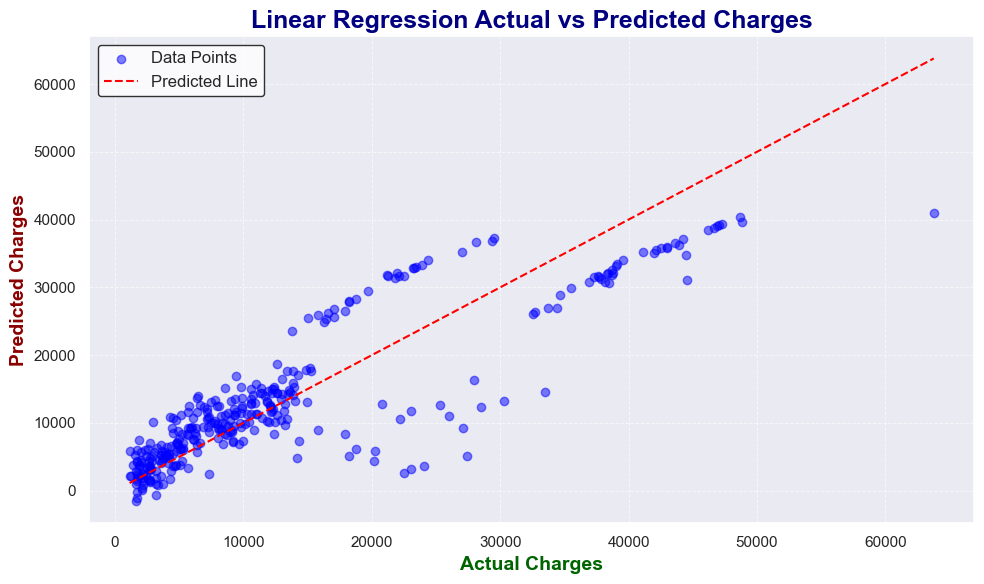

In [29]:
def plot(y_pred,model_title):
    plt.figure(figsize=(10, 6))
    sns.set()
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')   
    plt.title(f'{model_title} Actual vs Predicted Charges', fontsize=18, fontweight='bold', color='navy')
    plt.xlabel('Actual Charges', fontsize=14, fontweight='bold', color='darkgreen')
    plt.ylabel('Predicted Charges', fontsize=14, fontweight='bold', color='darkred')
    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
    plt.legend(['Data Points', 'Predicted Line'], fontsize=12, loc='best', frameon=True, facecolor='white', edgecolor='black')
    plt.tight_layout()
    plt.show()
models=['Linear Regression', 'Decision Tree', 'Random Forest', 'Bagging Regressor']
plot(Linear_Regression[0],models[0])

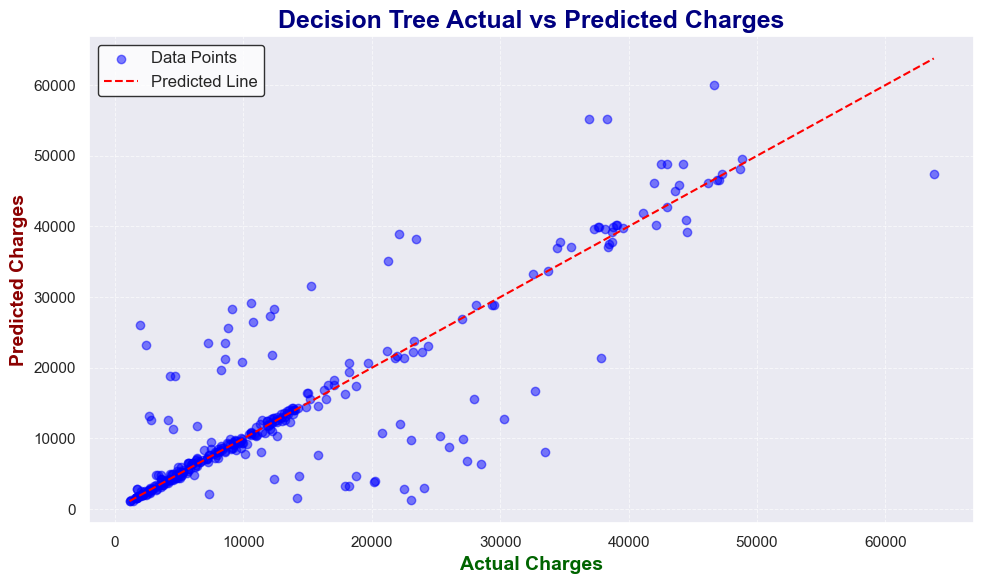

In [30]:
plot(Decision_Tree[0],models[1])

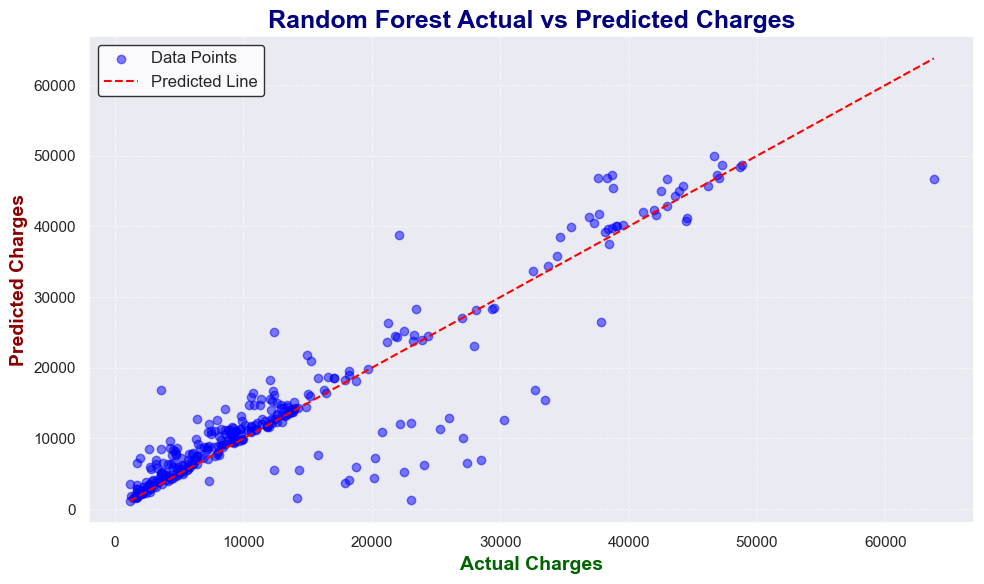

In [31]:
plot(Random_forest[0],models[2])

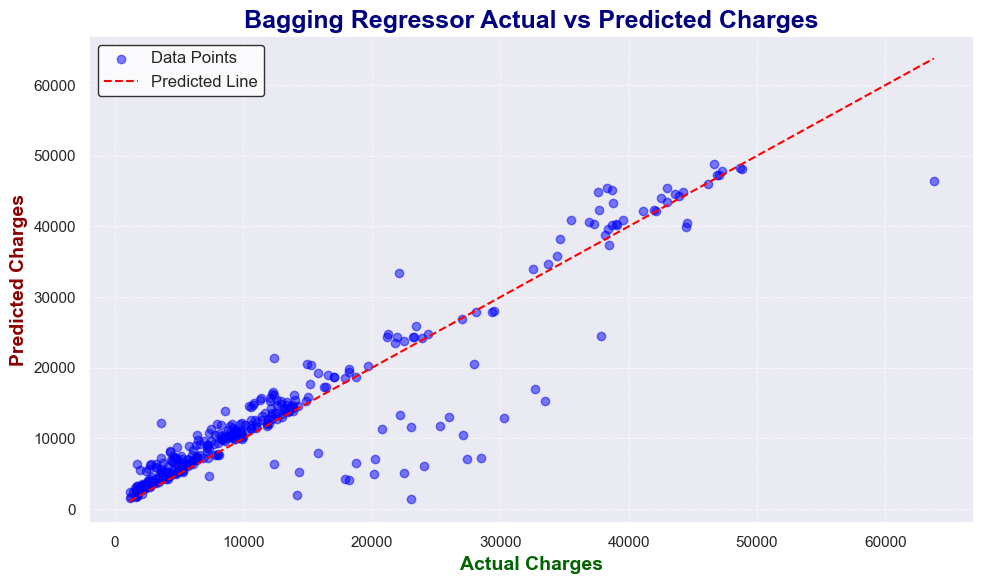

In [36]:
plot(Bagging_Regressor[0],models[3])

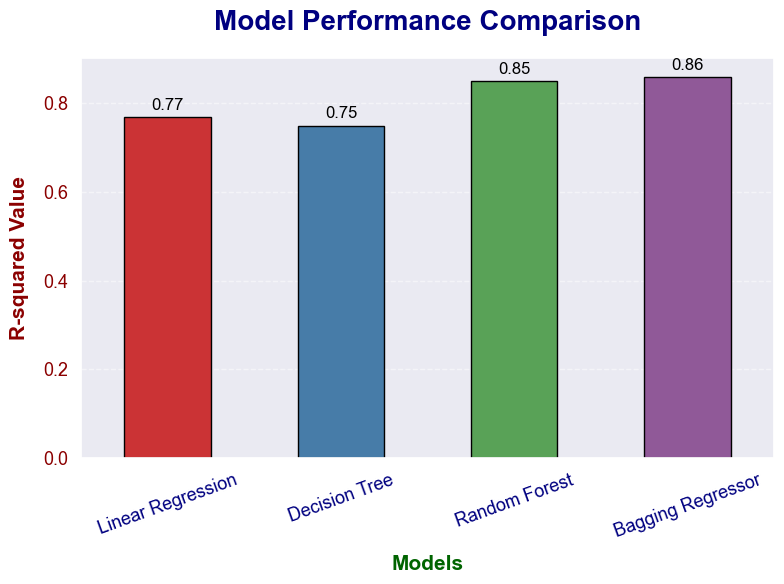

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=models, y=[.77, .75, .85, .86], palette='Set1', edgecolor='black',width=0.5)
plt.title('Model Performance Comparison', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Models', fontsize=15, fontweight='bold', color='darkgreen', labelpad=10)
plt.ylabel('R-squared Value', fontsize=15, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=20, fontsize=13, color='navy')
plt.yticks(fontsize=13, color='darkred')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=12, color='black', padding=3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

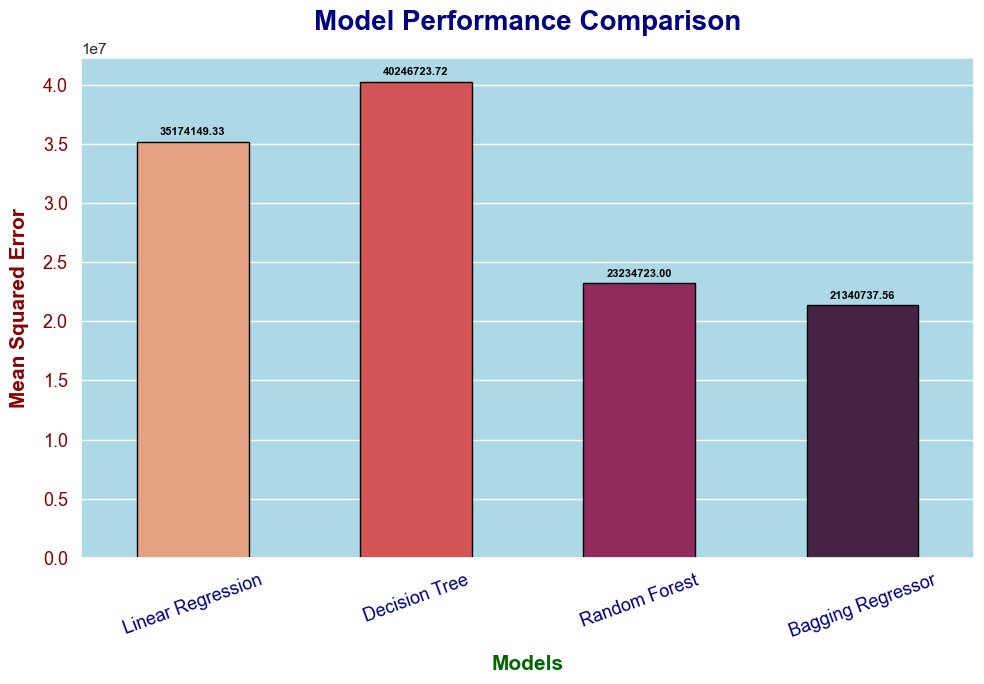

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=models, 
    y=[35174149.33, 40246723.72, 23234723.00, 21340737.56], 
    palette='rocket_r', 
    edgecolor='black',
    width=0.5
)
sns.set()
ax.set_facecolor('lightblue')
plt.title('Model Performance Comparison', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Models', fontsize=15, fontweight='bold', color='darkgreen', labelpad=10)
plt.ylabel('Mean Squared Error', fontsize=15, fontweight='bold', color='darkred', labelpad=10)
plt.xticks(rotation=20, fontsize=13, color='navy')
plt.yticks(fontsize=13, color='darkred')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=8, color='black', padding=3,fontweight='bold')
plt.tight_layout()
plt.show()